# Linear Regression

## 1 Explain how a linear regression algorithm trains in your own words

## 2 Load the sklearn boston dataset

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [12]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

## 3 Visualize the dataset using graphs

In [13]:
data = load_boston()

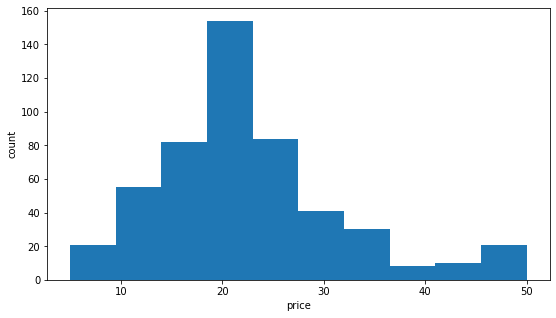

In [14]:
plt.figure(figsize=(9, 5))
plt.hist(data.target)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

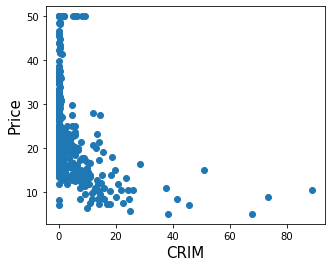

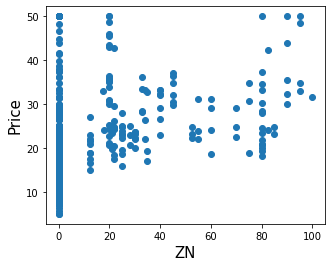

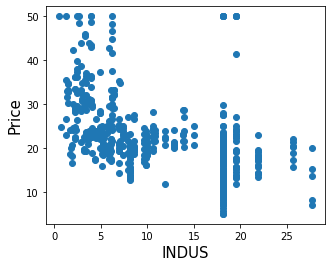

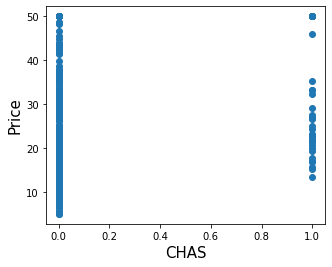

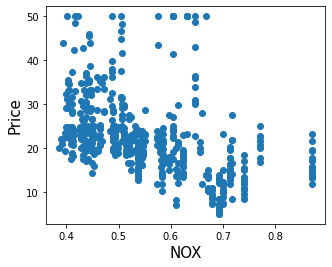

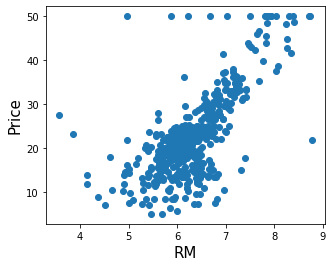

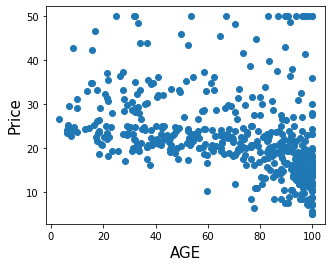

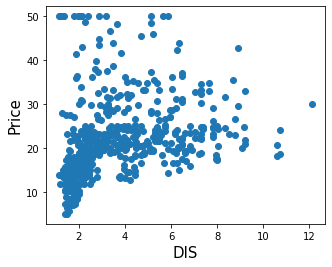

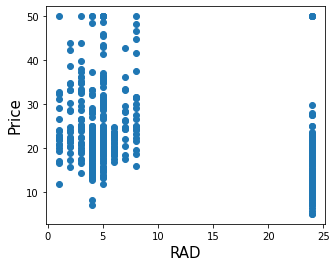

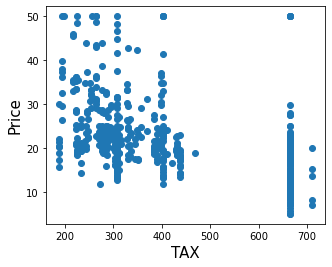

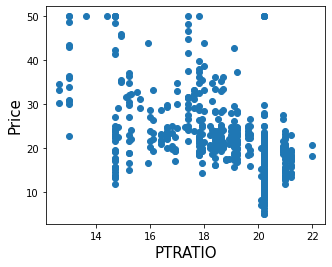

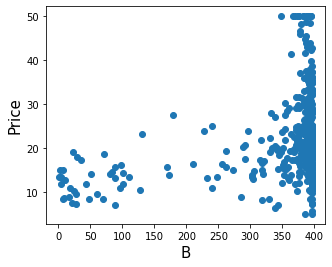

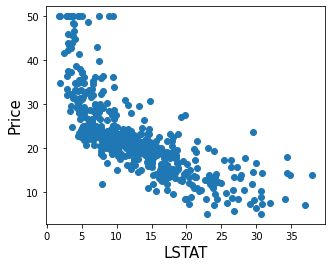

In [15]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.show()
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

Observations:
1. Lesser the crime rate,higher the price.
2. Maximum number of houses have zero residential zoned land.
3. 

In [16]:
#data.describe()

In [17]:
sns.set_theme()

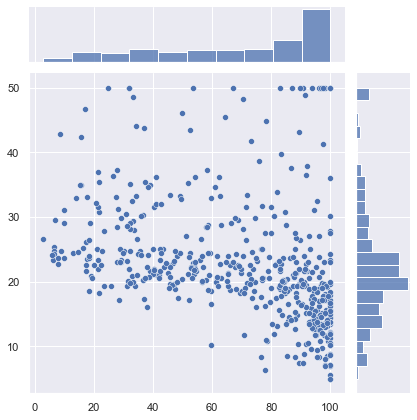

In [18]:
sns.jointplot(data = data,x=data.data[:,6], y=data.target)

## 4 Calculate the pearson correlation matrix of the data

In [19]:
#convert the data in to pandas dataframe
df_features = pd.DataFrame(data.data, columns = data.feature_names)
display(df_features)
#all the independant variables/predictors are named as dfx

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [20]:
df_target = pd.DataFrame(data.target, columns = ['target'])
display(df_target)
#the dependant variable/outcome is the target and it is named as dfy

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [21]:
boston_data = df_features.join(df_target)
#both the dataframes are combined and named as dfcombine

In [22]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


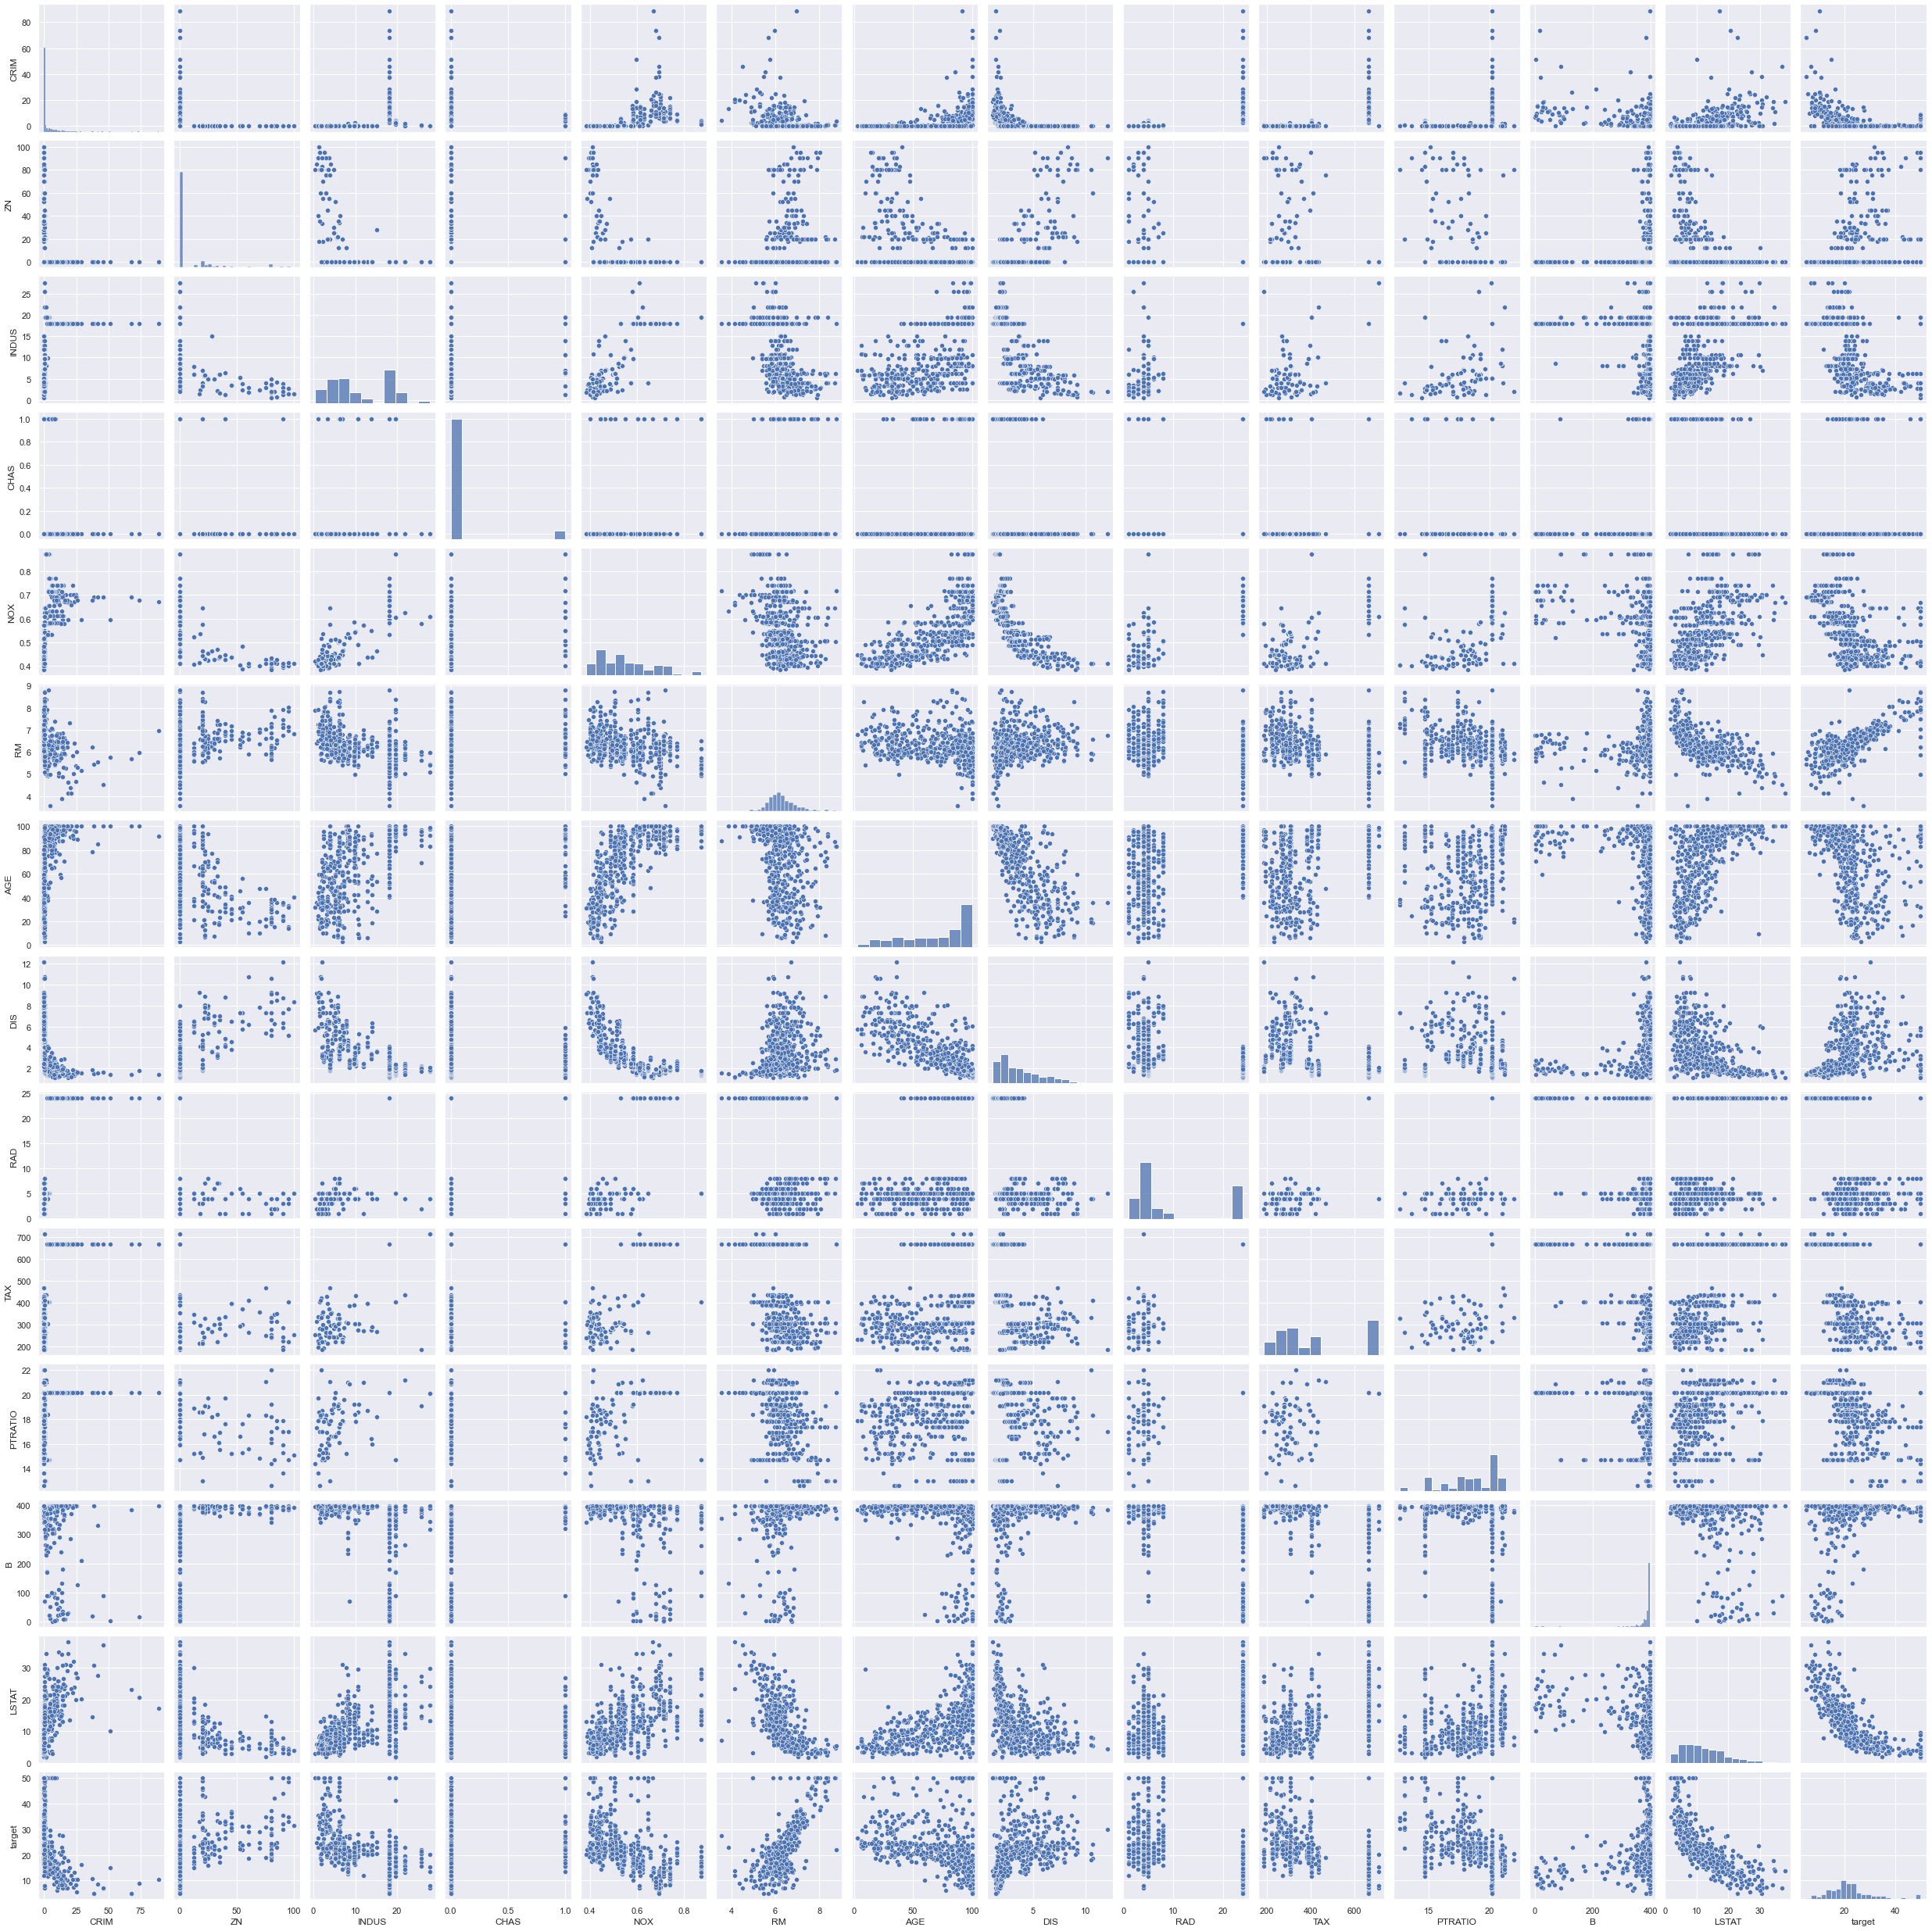

In [23]:
sns.pairplot(data=boston_data)

<AxesSubplot:>

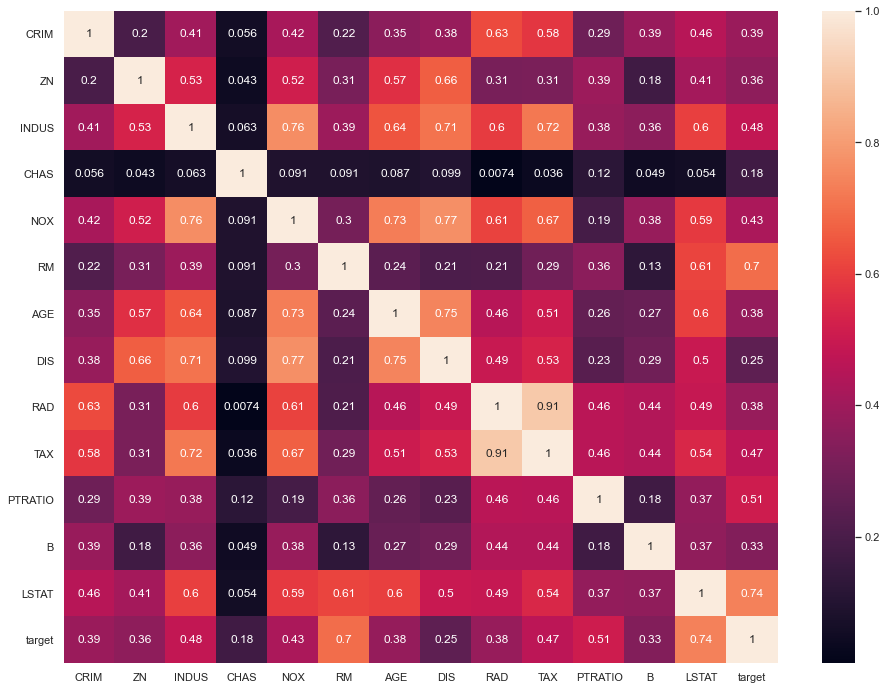

In [24]:
plt.figure(figsize = (16,12))
sns.heatmap(boston_data.corr().abs(),annot = True)

## 5 Select features which are more related to the target variable using graphs and the correlation matrix, are the both indicating the same features? (MEDV is the target variable)

In [25]:
# LSTAT
# PTRATIO
# TAX
# RM
# NOX
# INDUS

#Yes

display(boston_data)
boston_entire_ds = boston_data
boston_6_feature = boston_data[["INDUS","NOX","RM","TAX","PTRATIO","LSTAT","target"]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
print (boston_data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


## 6 Compare correlation of feature between themselves and if two features are highly correlated remove one of them (the one with lesser correlation with the target variable) 

In [27]:
# Remove RM 
boston_5_feature = boston_6_feature.drop(["RM"],axis=1)

## 7 perform the following steps 3 times, 1 with the entire dataset, 1 with the selected features from step 5 and 1 with the selected features from step 6 

## NOTE: FEATURE SELECTION IS USUALLY REQUIRED ONLY WHEN THERE ARE 100s TO 1000s OF FEATURES OR MORE, BUT HERE FOR EDUCATIONAL PURPOSES WE ARE PRACTICING FEATURE SELECTION ON A SMALLER DATASET

## 8 Split into train and test

## 8.1 

In [28]:
# boston_entire_ds 

X_train1, X_test1, y_train1, y_test1 = train_test_split(boston_entire_ds.drop(["target"],axis=1),boston_entire_ds["target"], test_size = 0.25, random_state = 100)



## 8.2

In [29]:
# boston_6_feature
X_train2, X_test2, y_train2, y_test2 = train_test_split(boston_6_feature.drop(["target"],axis=1),boston_6_feature["target"], test_size = 0.25, random_state = 100)


## 8.3

In [30]:
# boston_5_feature
X_train3, X_test3, y_train3, y_test3 = train_test_split(boston_5_feature.drop(["target"],axis=1),boston_5_feature["target"], test_size = 0.25, random_state = 100)


## 9 Normalize the data

## 9.1

In [31]:
scaler1 =  MinMaxScaler()
scaler1.fit(X_train1)
X_train_scaled1 = scaler1.transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

## 9.2

In [32]:
scaler2 =  MinMaxScaler()
scaler2.fit(X_train2)
X_train_scaled2 = scaler2.transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

## 9.3

In [33]:
scaler3 =  MinMaxScaler()
scaler3.fit(X_train3)
X_train_scaled3 = scaler3.transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

## 10 Train the model and perform hyper parameter tuning using cross validation

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model = LinearRegression()
param_grid = { "fit_intercept": [True, False], "normalize": [True, False],"copy_X": [True, False]}
cv_model1 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring = 'f1_macro',n_jobs =8)
cv_model1.fit(X_train_scaled1,y_train1)
#cv_model.best_params_

cv_model2 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring = 'f1_macro',n_jobs =8)
cv_model2.fit(X_train_scaled2,y_train2)

cv_model3 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring = 'f1_macro',n_jobs =8)
cv_model3.fit(X_train_scaled3,y_train3)

cv_model1.best_params_

/Users/shreyahunur/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
/Users/shreyahunur/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
/Users/shreyahunur/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model = LinearRegression()
param_grid = { "fit_intercept": [True, False], "normalize": [True, False],"copy_X": [True, False]}
cv_model1 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring = 'r2',n_jobs =10)
cv_model1.fit(X_train_scaled1,y_train1)
#cv_model.best_params_

cv_model2 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring = 'r2',n_jobs =10)
cv_model2.fit(X_train_scaled2,y_train2)

cv_model3 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring = 'r2',n_jobs =10)
cv_model3.fit(X_train_scaled3,y_train3)

cv_model1.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [ ]:
model.get_params().keys()

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score
lm = LinearRegression()
scores = cross_val_score(lm,X_train_scaled1,y_train1, cv = 50)    #cv is the number of folds, scores will give an array of scores

#print(scores, np.mean(scores), np.std(scores))


predictions = cross_val_predict(lm, X_test_scaled1, y_test1, cv = 50)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = r2_score(y_test1, predictions) 

print(accuracy)

0.670321350013036


## 11 Test the model on test set

In [38]:
from sklearn.metrics import r2_score

## 11.1

In [64]:
y_train_pred1 = cv_model1.predict(X_train_scaled1)
y_test_pred1 = cv_model1.predict(X_test_scaled1)
r2_score(y_test1, y_test_pred1)

0.7246154314616737

## 11.2

In [65]:
y_train_pred2 = cv_model2.predict(X_train_scaled2)
y_test_pred2 = cv_model2.predict(X_test_scaled2)
r2_score(y_test2, y_test_pred2)

0.6701926584778425

## 11.3

In [66]:
y_train_pred3 = cv_model3.predict(X_train_scaled3)
y_test_pred3 = cv_model3.predict(X_test_scaled3)
r2_score(y_test3, y_test_pred3)

0.5980291900891428

In [ ]:
from sklearn.metrics import accuracy_score

In [55]:
lr1=LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
lr1.fit(X_train_scaled1,y_train1)

lr2=LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
lr2.fit(X_train_scaled2,y_train2)

lr3=LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
lr3.fit(X_train_scaled3,y_train3)


LinearRegression(normalize=True)

In [56]:
display(lr1.score(X_test_scaled1, y_test1))
display(lr2.score(X_test_scaled2, y_test2))
display(lr3.score(X_test_scaled3, y_test3))

0.7246154314616733

0.6701926584778425

0.598029190089143